In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pycaret.classification import *

In [2]:
df1 = pd.read_csv('train.csv', sep=',')
df2 = pd.read_csv('test.csv', sep=',')

In [5]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


# Normalizer - Normalizando os dados de Treino
norm= Normalizer()

df1[['var2', 'var3', 'var7', 'var8', 'var9', 'var10', 'var15', 'var16', 'var17', 'var18', 'var23', 'var26', 'var28', 'var31', 'var37', 'var38', 'var39', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var50', 'var51', 'var52', 'var53', 'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var67']]= norm.fit_transform(df1[['var2', 'var3', 'var7', 'var8', 'var9', 'var10', 'var15', 'var16', 'var17', 'var18', 'var23', 'var26', 'var28', 'var31', 'var37', 'var38', 'var39', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var50', 'var51', 'var52', 'var53', 'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var67']])

scaler = StandardScaler()
df1[['var1', 'var4', 'var5', 'var6', 'var11', 'var12', 'var13', 'var14', 'var19', 'var20', 'var21', 'var22', 'var24', 'var25', 'var27', 'var29', 'var30', 'var32', 'var33', 'var34', 'var35', 'var36', 'var40', 'var49', 'var54', 'var60']]=scaler.fit_transform(df1[['var1', 'var4', 'var5', 'var6', 'var11', 'var12', 'var13', 'var14', 'var19', 'var20', 'var21', 'var22', 'var24', 'var25', 'var27', 'var29', 'var30', 'var32', 'var33', 'var34', 'var35', 'var36', 'var40', 'var49', 'var54', 'var60']])

# Normalizer - Normalizando os dados de Teste
norm= Normalizer()

df2[['var2', 'var3', 'var7', 'var8', 'var9', 'var10', 'var15', 'var16', 'var17', 'var18', 'var23', 'var26', 'var28', 'var31', 'var37', 'var38', 'var39', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var50', 'var51', 'var52', 'var53', 'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var67']]= norm.fit_transform(df2[['var2', 'var3', 'var7', 'var8', 'var9', 'var10', 'var15', 'var16', 'var17', 'var18', 'var23', 'var26', 'var28', 'var31', 'var37', 'var38', 'var39', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var50', 'var51', 'var52', 'var53', 'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var67']])

scaler = StandardScaler()
df2[['var1', 'var4', 'var5', 'var6', 'var11', 'var12', 'var13', 'var14', 'var19', 'var20', 'var21', 'var22', 'var24', 'var25', 'var27', 'var29', 'var30', 'var32', 'var33', 'var34', 'var35', 'var36', 'var40', 'var49', 'var54', 'var60']]=scaler.fit_transform(df2[['var1', 'var4', 'var5', 'var6', 'var11', 'var12', 'var13', 'var14', 'var19', 'var20', 'var21', 'var22', 'var24', 'var25', 'var27', 'var29', 'var30', 'var32', 'var33', 'var34', 'var35', 'var36', 'var40', 'var49', 'var54', 'var60']])

In [6]:
train = df1.copy()

test = df2.copy()

In [72]:
del train['id']

In [87]:
model1 = setup(train, target = 'y', session_id=42, train_size=0.8, fix_imbalance=True)

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14123, 69)"
5,Missing Values,False
6,Numeric Features,66
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [88]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8704,0.8772,0.5868,0.7132,0.6436,0.5654,0.5695,2.8170
catboost,CatBoost Classifier,0.8702,0.8748,0.5695,0.7215,0.6362,0.5585,0.5645,38.1260
gbc,Gradient Boosting Classifier,0.8650,0.8709,0.6334,0.6716,0.6516,0.5680,0.5686,23.8190
xgboost,Extreme Gradient Boosting,0.8646,0.8646,0.5526,0.7047,0.6194,0.5385,0.5444,23.6530
rf,Random Forest Classifier,0.8635,0.8566,0.5708,0.6915,0.6251,0.5426,0.5465,7.1640
et,Extra Trees Classifier,0.8540,0.8365,0.4718,0.6981,0.5628,0.4791,0.4925,3.3030
ada,Ada Boost Classifier,0.8506,0.8564,0.6272,0.6253,0.6261,0.5327,0.5328,4.7780
dt,Decision Tree Classifier,0.7913,0.7077,0.5686,0.4805,0.5207,0.3885,0.3909,1.4350
ridge,Ridge Classifier,0.7793,0.0000,0.6937,0.4648,0.5564,0.4172,0.4322,0.6330
lr,Logistic Regression,0.7792,0.8245,0.7022,0.4648,0.5593,0.4200,0.4360,5.3790


In [89]:
%%time
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8779,0.8727,0.6327,0.7222,0.6745,0.5998,0.6018
1,0.8558,0.8691,0.6106,0.6479,0.6287,0.5393,0.5397
2,0.8726,0.8796,0.6991,0.6752,0.6870,0.6070,0.6071
3,0.8664,0.8682,0.6133,0.6832,0.6464,0.5643,0.5655
4,0.8681,0.8742,0.6489,0.6759,0.6621,0.5803,0.5804
5,0.8611,0.8576,0.6311,0.6574,0.6440,0.5577,0.5579
6,0.8549,0.8531,0.6089,0.6432,0.6256,0.5356,0.5360
7,0.8637,0.8780,0.6267,0.6682,0.6468,0.5625,0.5629
8,0.8627,0.8792,0.6356,0.6620,0.6485,0.5633,0.5634
9,0.8671,0.8776,0.6267,0.6812,0.6528,0.5708,0.5716


CPU times: user 1min 3s, sys: 520 ms, total: 1min 3s
Wall time: 5min 37s


In [90]:
%%time
tuned = tune_model(model, optimize = 'F1', n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8717,0.8710,0.6150,0.7056,0.6572,0.5787,0.5808
1,0.8593,0.8685,0.5973,0.6650,0.6294,0.5428,0.5440
2,0.8708,0.8765,0.6726,0.6786,0.6756,0.5949,0.5949
3,0.8735,0.8637,0.6178,0.7092,0.6603,0.5830,0.5851
4,0.8673,0.8759,0.6444,0.6744,0.6591,0.5767,0.5770
5,0.8673,0.8532,0.6311,0.6794,0.6544,0.5724,0.5730
6,0.8602,0.8521,0.6222,0.6573,0.6393,0.5526,0.5530
7,0.8611,0.8809,0.6133,0.6635,0.6374,0.5516,0.5523
8,0.8663,0.8777,0.6356,0.6745,0.6545,0.5716,0.5720
9,0.8716,0.8758,0.6356,0.6942,0.6636,0.5844,0.5853


CPU times: user 30.5 s, sys: 658 ms, total: 31.1 s
Wall time: 1h 47min 59s


In [77]:
params = {"max_depth": np.random.randint(1, (len(train.columns)*.85),20),
         "max_features": np.random.randint(1, len(train.columns),20),
         "min_samples_leaf": [2,3,4,5,6],
         "criterion": ["gini", "entropy"]
         }

In [78]:
%%time
tuned = tuned(model, custom_grid = params)

TypeError: 'DecisionTreeClassifier' object is not callable

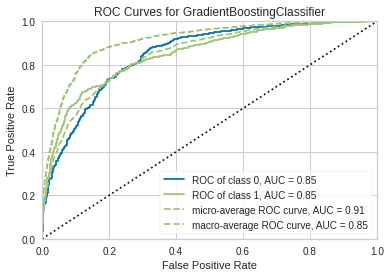

In [91]:
plot_model(tuned)

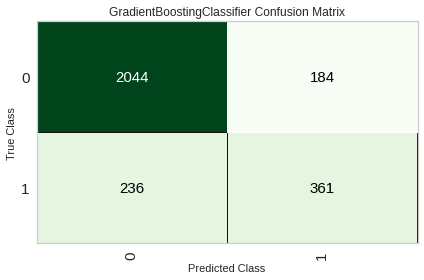

In [92]:
plot_model(tuned, plot='confusion_matrix')

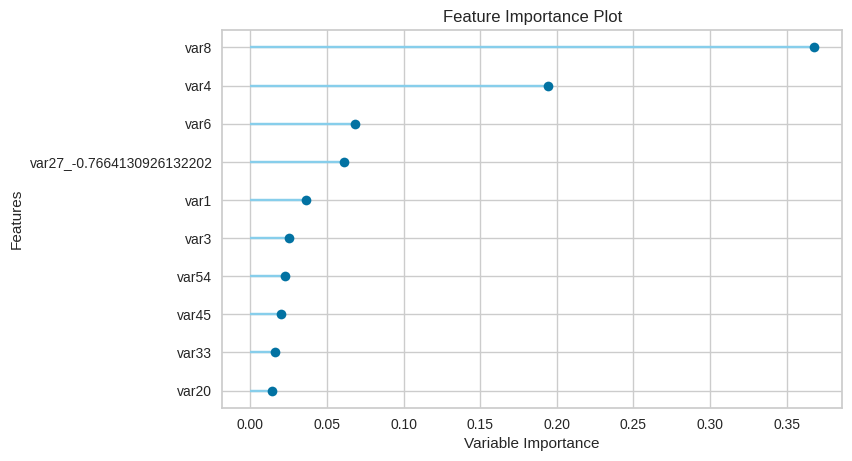

In [93]:
plot_model(tuned, plot='feature')

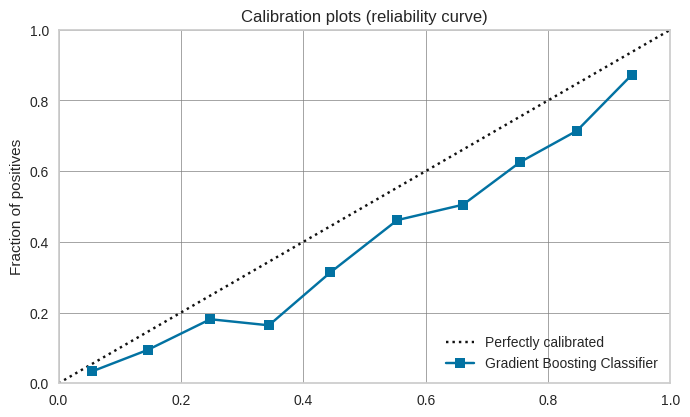

In [94]:
plot_model(tuned, plot='calibration')

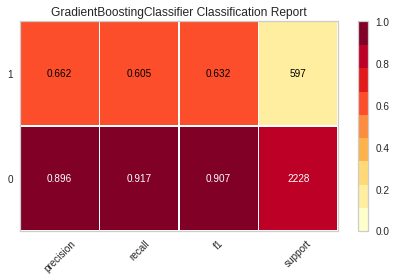

In [95]:
plot_model(tuned, plot='class_report')

In [96]:
model_pred_holdout = predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8513,0.8492,0.6047,0.6624,0.6322,0.5393,0.5402


In [102]:
model_pred_new = predict_model(tuned, data = test) #new_data is pd dataframe

In [103]:
model_pred_new['Label'].value_counts()

0    11279
1     9904
Name: Label, dtype: int64

In [104]:
df = pd.DataFrame()
df['id'] = model_pred_new['id']
df['predicted'] = model_pred_new['Label']
del model_pred_new['Label']


In [105]:
submission.to_csv('submission_Pycaret_gbc.csv')

In [106]:
!mkdir ~/.kaggle

!cp /home/felipe/Downloads/kaggle.json /home/felipe/.kaggle/kaggle.json

!cd /home/felipe/.kaggle/ && ls

!kaggle datasets list -s 'Porto Seguro'

mkdir: não foi possível criar o diretório “/home/felipe/.kaggle”: Arquivo existe
kaggle.json
ref                                                      title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aharless/porto-seguro-public-kernel-results              Porto Seguro public kernel results                  3KB  2017-12-01 22:06:38             42         10  0.7647059        
vpaslay/kaggleportosegurosubmissions                     kaggle-porto-seguro-submissions                    34MB  2017-11-12 13:49:51           2059          1  0.4117647        
pushero/porto-seguros-safe-driver-prediction-test-data   Porto Seguro’s Safe Driver Prediction test data    44MB  2017-10-03 09:54:36            154          3  0.47058824       
ogrellier/po

In [107]:
!kaggle competitions submit -c porto-seguro-data-challenge -f submission_Pycaret_gbc.csv -m "Submission Pycaret"

100%|█████████████████████████████████████████| 272k/272k [00:02<00:00, 124kB/s]
Successfully submitted to Porto Seguro Data Challenge